# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model


#Accessing The Data

In [16]:
df = pd.read_csv("customer_data.csv")
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


#Preprocessing The Data

In [17]:
df = df.drop(columns=['ID','Var_1'])
df 

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A
...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,Low,7.0,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,B


In [18]:
df = df.dropna()
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
5,Male,Yes,56,No,Artist,0.0,Average,2.0,C
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,C
...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,B
8064,Male,No,35,No,Executive,3.0,Low,4.0,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,B


In [20]:
df = df[~df['Family_Size'].isin([7.0,8.0,9.0])]
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
5,Male,Yes,56,No,Artist,0.0,Average,2.0,C
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,C
...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,B
8064,Male,No,35,No,Executive,3.0,Low,4.0,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,B


# Q. Formulate a Deep Learning problem by taking ‘Segmentation’ as the target and other columns as features. Is it classification or regression? Justify.
 Ans. Making a Deep Learning Model with Segmentation as the Target is a Classification Problem. This is the case because the Column Segmentation is a Categorical Variable with Distinct values Like A,B,C,D. Hence we need a Classification Model to classify each data point to one of these classes.

#Preprocessing The Data

In [79]:
from sklearn import preprocessing  
from sklearn.preprocessing import StandardScaler

label_encoder = preprocessing.LabelEncoder()

X = df.drop(columns='Segmentation')
y = df['Segmentation']

categorical_cols = ['Gender','Ever_Married','Graduated','Profession','Spending_Score']
for i in categorical_cols:
    X[i] = label_encoder.fit_transform(X[i]) 
y = label_encoder.fit_transform(y) 

y=np.array(y).reshape(-1,1)

#Normalize the data
sc=StandardScaler()
X=sc.fit_transform(X)

#Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                  test_size=0.2,random_state=10)
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((5245, 8), (1312, 8), (5245, 1), (1312, 1))

#Multi Layer Perceptron with 1 Hidden layer

The Input layer has 8 units because the data has 8 input features from the X set. The hidden layer has 200 units to give the model enough trainable parameters to learn important collerations in the data, but not too much because of which the model might overtrain. The output layer has 4 units, which corresponds to the number of classes for the classification, namely [A,B,C,D].

We use Adam Optimizer because the results of the Adam optimizer are generally better than every other optimization algorithm, have faster computation time, and require fewer parameters for tuning. The activation function in the Hidden layer is ReLu because it is a simple activation function, but also gives the model non-linearity allowing it to learn more complex relationships. The activation function in the Output layer is Softmax because it is the activation function designed for Multi Class classification problems. The loss function used is SparseCategoricalCrossentropy because it is able to calculate the loss for multi class classification by comparing the probability of each class.

In [80]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(200,activation='relu'))
model.add(tf.keras.layers.Dense(4,activation='softmax'))

Epoch 1/10
132/132 [==============================] - 1s 3ms/step - loss: 1.1845 - accuracy: 0.4697 - val_loss: 1.1247 - val_accuracy: 0.4995
Epoch 2/10
132/132 [==============================] - 0s 3ms/step - loss: 1.1072 - accuracy: 0.5145 - val_loss: 1.1090 - val_accuracy: 0.5129
Epoch 3/10
132/132 [==============================] - 0s 3ms/step - loss: 1.0949 - accuracy: 0.5226 - val_loss: 1.0998 - val_accuracy: 0.5100
Epoch 4/10
132/132 [==============================] - 0s 2ms/step - loss: 1.0850 - accuracy: 0.5214 - val_loss: 1.0967 - val_accuracy: 0.5091
Epoch 5/10
132/132 [==============================] - 0s 2ms/step - loss: 1.0798 - accuracy: 0.5336 - val_loss: 1.1006 - val_accuracy: 0.5071
Epoch 6/10
132/132 [==============================] - 0s 2ms/step - loss: 1.0743 - accuracy: 0.5396 - val_loss: 1.1000 - val_accuracy: 0.5062
Epoch 7/10
132/132 [==============================] - 0s 2ms/step - loss: 1.0708 - accuracy: 0.5329 - val_loss: 1.1042 - val_accuracy: 0.5062
Epoch 

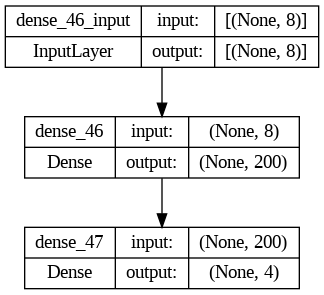

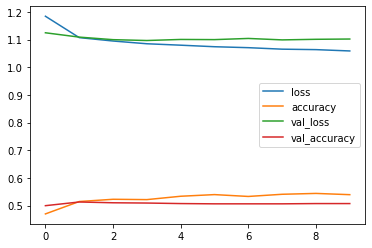

In [81]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

tf.random.set_seed(10)
history=model.fit(X_train,y_train,epochs=10,validation_split=0.2)  #20% size of validation set
pd.DataFrame(history.history).plot();
plot_model(model,show_shapes=True)

The performance of the model is close to 50% percent in accuracy. The model trains quickly and the training and validation accuracy are similar so there is not much overtraining.

#Model with Callback Early Stop, patience value of 3
The model trains much faster than the previous model and it also reduces overtraing as the train accurancy and validation accury are much closer

Epoch 1/10
132/132 [==============================] - 1s 4ms/step - loss: 1.1814 - accuracy: 0.4595 - val_loss: 1.1232 - val_accuracy: 0.4938
Epoch 2/10
132/132 [==============================] - 0s 3ms/step - loss: 1.1087 - accuracy: 0.5119 - val_loss: 1.1109 - val_accuracy: 0.5014
Epoch 3/10
132/132 [==============================] - 0s 3ms/step - loss: 1.0952 - accuracy: 0.5219 - val_loss: 1.1003 - val_accuracy: 0.5081
Epoch 4/10
132/132 [==============================] - 0s 2ms/step - loss: 1.0852 - accuracy: 0.5229 - val_loss: 1.0975 - val_accuracy: 0.5043
Epoch 5/10
132/132 [==============================] - 0s 2ms/step - loss: 1.0801 - accuracy: 0.5331 - val_loss: 1.1001 - val_accuracy: 0.5071
Epoch 6/10
132/132 [==============================] - 0s 2ms/step - loss: 1.0743 - accuracy: 0.5381 - val_loss: 1.0996 - val_accuracy: 0.5157
Epoch 7/10
132/132 [==============================] - 0s 2ms/step - loss: 1.0708 - accuracy: 0.5341 - val_loss: 1.1046 - val_accuracy: 0.5129


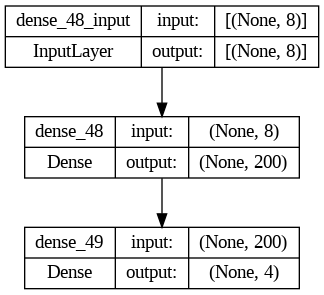

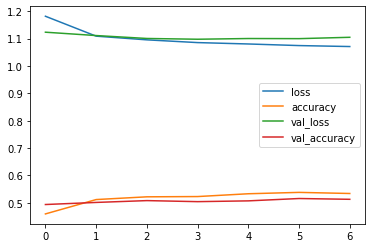

In [82]:
model_2=tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(200,activation='relu'))
model_2.add(tf.keras.layers.Dense(4,activation='softmax'))
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

tf.random.set_seed(10)
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)  #Patience value of 3
history=model_2.fit(X_train,y_train,epochs=10,validation_split=0.2,callbacks=[early_stop])  #20% size of validation set
pd.DataFrame(history.history).plot();
plot_model(model_2,show_shapes=True)

#Model with Dropout rate of 0.1
The model with dropout does not increase accuracy much, but it does help in reducing overtraining.

Epoch 1/10
132/132 [==============================] - 1s 3ms/step - loss: 1.1772 - accuracy: 0.4712 - val_loss: 1.1230 - val_accuracy: 0.4995
Epoch 2/10
132/132 [==============================] - 0s 2ms/step - loss: 1.1132 - accuracy: 0.5064 - val_loss: 1.1126 - val_accuracy: 0.5052
Epoch 3/10
132/132 [==============================] - 0s 2ms/step - loss: 1.1026 - accuracy: 0.5167 - val_loss: 1.1024 - val_accuracy: 0.5138
Epoch 4/10
132/132 [==============================] - 0s 2ms/step - loss: 1.0904 - accuracy: 0.5267 - val_loss: 1.0991 - val_accuracy: 0.5052
Epoch 5/10
132/132 [==============================] - 0s 2ms/step - loss: 1.0861 - accuracy: 0.5296 - val_loss: 1.1032 - val_accuracy: 0.5100
Epoch 6/10
132/132 [==============================] - 0s 2ms/step - loss: 1.0811 - accuracy: 0.5324 - val_loss: 1.1024 - val_accuracy: 0.5052
Epoch 7/10
132/132 [==============================] - 0s 2ms/step - loss: 1.0760 - accuracy: 0.5274 - val_loss: 1.1039 - val_accuracy: 0.5119
Epoch 

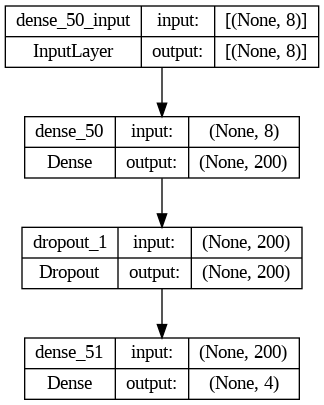

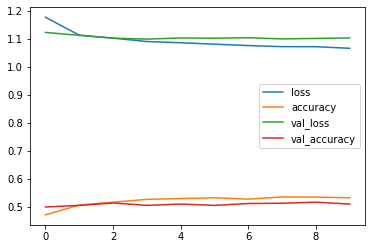

In [83]:
model_3=tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(200,activation='relu'))
model_3.add(tf.keras.layers.Dropout(0.1)) #dropout of 0.1
model_3.add(tf.keras.layers.Dense(4,activation='softmax'))
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

tf.random.set_seed(10)
history=model_3.fit(X_train,y_train,epochs=10,validation_split=0.2)  #20% size of validation set
pd.DataFrame(history.history).plot();
plot_model(model_3,show_shapes=True)

# Model with more Hidden layers
The bigger model increases overtraining as there are more trainable parameters. This model can be more useful with Early stopping and dropout to do regularization.

Epoch 1/10
132/132 [==============================] - 1s 3ms/step - loss: 1.1646 - accuracy: 0.4878 - val_loss: 1.1201 - val_accuracy: 0.4948
Epoch 2/10
132/132 [==============================] - 0s 2ms/step - loss: 1.0968 - accuracy: 0.5222 - val_loss: 1.1100 - val_accuracy: 0.5129
Epoch 3/10
132/132 [==============================] - 0s 2ms/step - loss: 1.0838 - accuracy: 0.5274 - val_loss: 1.1007 - val_accuracy: 0.5091
Epoch 4/10
132/132 [==============================] - 0s 2ms/step - loss: 1.0724 - accuracy: 0.5322 - val_loss: 1.0989 - val_accuracy: 0.5033
Epoch 5/10
132/132 [==============================] - 0s 2ms/step - loss: 1.0658 - accuracy: 0.5346 - val_loss: 1.0977 - val_accuracy: 0.5110
Epoch 6/10
132/132 [==============================] - 0s 3ms/step - loss: 1.0567 - accuracy: 0.5410 - val_loss: 1.1018 - val_accuracy: 0.5100
Epoch 7/10
132/132 [==============================] - 0s 3ms/step - loss: 1.0540 - accuracy: 0.5388 - val_loss: 1.1057 - val_accuracy: 0.5091
Epoch 

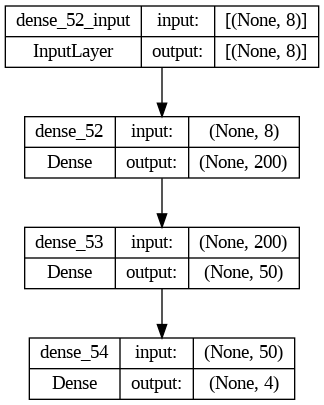

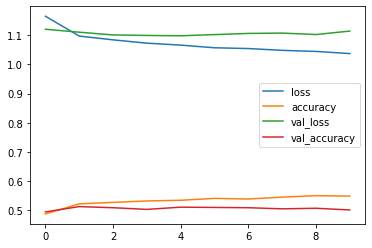

In [84]:
model_4=tf.keras.Sequential()
model_4.add(tf.keras.layers.Dense(200,activation='relu'))
model_4.add(tf.keras.layers.Dense(50,activation='relu'))
model_4.add(tf.keras.layers.Dense(4,activation='softmax'))
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

tf.random.set_seed(10)
history=model_4.fit(X_train,y_train,epochs=10,validation_split=0.2)  #20% size of validation set
pd.DataFrame(history.history).plot();
plot_model(model_4,show_shapes=True)

#Model with Different number of units
Decreasing the number of units helps with the overtraining and improves performacne. 

Epoch 1/10
132/132 [==============================] - 1s 3ms/step - loss: 1.2272 - accuracy: 0.4383 - val_loss: 1.1457 - val_accuracy: 0.4957
Epoch 2/10
132/132 [==============================] - 0s 2ms/step - loss: 1.1316 - accuracy: 0.4971 - val_loss: 1.1211 - val_accuracy: 0.5052
Epoch 3/10
132/132 [==============================] - 0s 2ms/step - loss: 1.1102 - accuracy: 0.5062 - val_loss: 1.1085 - val_accuracy: 0.5157
Epoch 4/10
132/132 [==============================] - 0s 2ms/step - loss: 1.0954 - accuracy: 0.5155 - val_loss: 1.1052 - val_accuracy: 0.5119
Epoch 5/10
132/132 [==============================] - 0s 2ms/step - loss: 1.0859 - accuracy: 0.5288 - val_loss: 1.1030 - val_accuracy: 0.4967
Epoch 6/10
132/132 [==============================] - 0s 2ms/step - loss: 1.0781 - accuracy: 0.5324 - val_loss: 1.1000 - val_accuracy: 0.5138
Epoch 7/10
132/132 [==============================] - 0s 2ms/step - loss: 1.0733 - accuracy: 0.5293 - val_loss: 1.0993 - val_accuracy: 0.5119
Epoch 

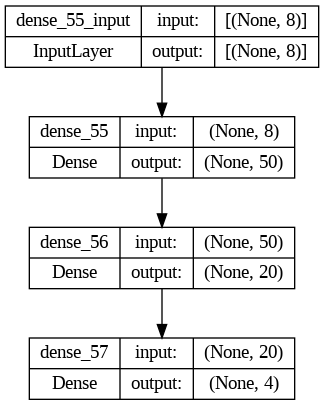

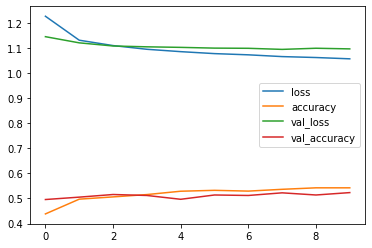

In [85]:
model_5=tf.keras.Sequential()
model_5.add(tf.keras.layers.Dense(50,activation='relu'))
model_5.add(tf.keras.layers.Dense(20,activation='relu'))
model_5.add(tf.keras.layers.Dense(4,activation='softmax'))
model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

tf.random.set_seed(10)
history=model_5.fit(X_train,y_train,epochs=10,validation_split=0.2)  #20% size of validation set
pd.DataFrame(history.history).plot();
plot_model(model_5,show_shapes=True)

# The best models are Model3 and Model5 based on Test accury and Test Loss. 
Model3: Single layer model with dropout
Model5: Model with 2 hidden layers but less number of units.  

41/41 [==============================] - 0s 1ms/step - loss: 1.0653 - accuracy: 0.5282


<Axes: >

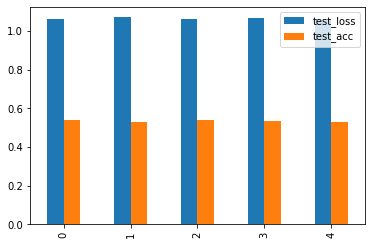

In [97]:
a,b = model.evaluate(X_test,y_test)
a1,b1 = model_2.evaluate(X_test,y_test)
a2,b2 = model_3.evaluate(X_test,y_test)
a3,b3 = model_4.evaluate(X_test,y_test)
a4,b4 = model_5.evaluate(X_test,y_test)
data = pd.DataFrame([{'name':'model_1','test_loss':a,'test_acc':b},
              {'name':'model_2','test_loss':a1,'test_acc':b1},
              {'name':'model_3','test_loss':a2,'test_acc':b2},
              {'name':'model_4','test_loss':a3,'test_acc':b3},
              {'name':'model_5','test_loss':a4,'test_acc':b4}])

data.plot.bar()